### Scribers
    Ito Elliot
    Akamine Aidan
    Serai Michael

In [1]:
## NOTE - Additional Python package Seaborn is used in addition to matplotlib. Please make sure this is installed prior to using this scribe.
from IPython.display import Image
import random
import numpy as np
# we will be using LA to find eigenvectors
from numpy import linalg as LA

import pandas as pd
import matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns # provide an alternative to matplotlib
import scipy  as sp # provide scientific function such as for integration and optimization

# we will be using preprocessing to normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


%matplotlib inline

## Quick Review
We shall go over a quick review of the concept of PCA before going back to it. First, let's say that we have a dataset which plots in two-dimensions which looks like the following:
<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/data_projection_3.png" width="700">

We want to find the axis which maximizes the variance. An example for this dataset is shown as follows:

<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/data_projection_4.png" width="700">

Now how do we find this axis? Let's show this by using a different example.

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-4, 2.2, 'proj_line_3')

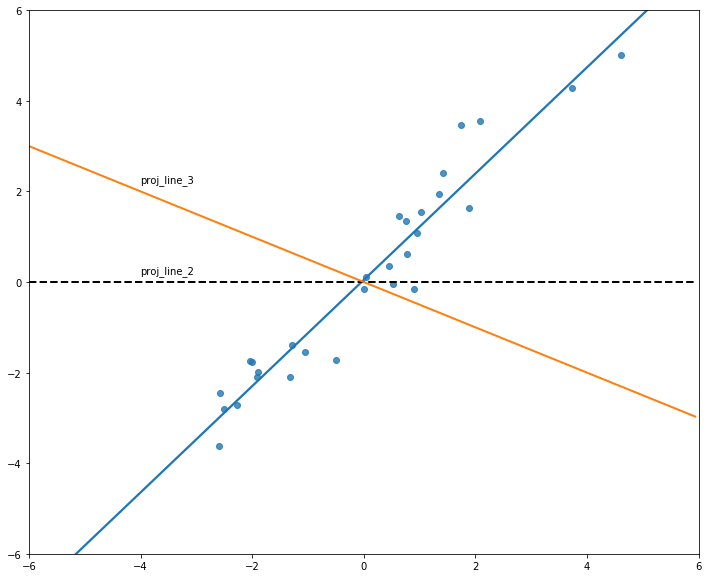

In [2]:
random.seed(246)

x_axis = np.random.normal(0, 2, 30)
x_axis.sort()
noise = np.random.normal(0, 0.5, 30)
y_axis = x_axis * 1.2 + noise

randomData = pd.DataFrame({'x': x_axis, 'y': y_axis})

plt.figure(figsize=(12,10))
_ = plt.ylim(-6, 6)
_ = plt.xlim(-6, 6)

sns.regplot(x_axis, y_axis, ci=False, )

# alternative projection line 1
plt.plot(np.arange(-6, 6, 0.06), [0 for _ in np.arange(-6, 6, 0.06)], 'k--', lw=2)
plt.text(-4, 0.2, 'proj_line_2')

# alternative projection line 1
plt.plot(np.arange(-6, 6, 0.06), [-x/2. for x in np.arange(-6, 6, 0.06)], '-', lw=2)
plt.text(-4, 2.2, 'proj_line_3')

Due to an issue, the following example showing the hand-drawn vectors uses a different randomized data. The three vectors show the different axes that could represent the data.


<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/axes.png
" width="700">

<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/projection_vectors_.png" width="700">

Going back to our previous example's dataset, we can find the best looking projection line by looking at the variance. In both examples, proj_line_1 shows the best result. 

In [3]:
# Best looking projection line
np.var(randomData.dot(np.array([[1],[1]])))

0    21.671845
dtype: float64

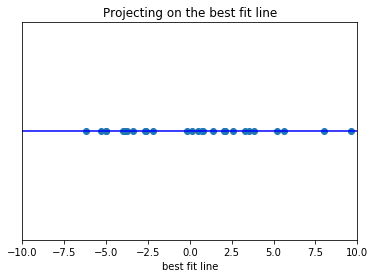

In [4]:
plt.xlabel('best fit line')

plt.title('Projecting on the best fit line')

plt.plot(np.arange(-12,12, 0.1), [0 for _ in np.arange(-12,12, 0.1)], 'b')
plt.scatter(randomData.dot(np.array([1,1])), [0 for _ in range(len(randomData))])

plt.xlim(-10, 10)

ax = plt.gca()

ax.yaxis.set_visible(False)

Let's look at the second best projection line, which is the x-axis in the two-dimensional space.

In [5]:
# Second best looking projection line

np.var(randomData.dot(np.array([[1], [0]])))

0    4.515796
dtype: float64

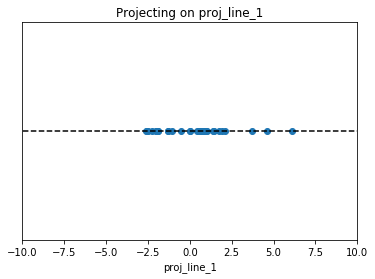

In [6]:
plt.xlabel('proj_line_1')
plt.title('Projecting on proj_line_1')

plt.plot(np.arange(-12,12, 0.1), [0 for _ in np.arange(-12,12, 0.1)], 'k--')
plt.scatter(randomData.dot(np.array([[1],[0]])), [0 for _ in range(len(randomData))])

plt.xlim(-10, 10)

ax = plt.gca()

ax.yaxis.set_visible(False)

As we look at the last projection line, we can see that it's variance is the lowest out of the three.

In [7]:
# Third best looking projection line

np.var(randomData.dot(np.array([[1], [-0.5]])))

0    0.860319
dtype: float64

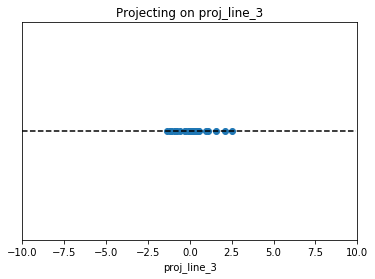

In [8]:
plt.xlabel('proj_line_3')
plt.title('Projecting on proj_line_3')

plt.plot(np.arange(-10,10, 0.1), [0 for _ in np.arange(-10,10, 0.1)], 'k--')
plt.scatter(randomData.dot(np.array([[1],[-0.5]])), [0 for _ in range(len(randomData))])

plt.xlim(-10, 10)

ax = plt.gca()

ax.yaxis.set_visible(False)

By having a high variance in the projection line, we can keep more information about the points in resulting one-dimension than if we use lower variance projection line. In addition, we find that an orthogonal projection line to the projection line with a high variance would have the lowest variance. This makes sense as the variance shows the spread of the distribution. This concept is used by PCA when it is dimension-reducing a dataset.

## PCA
### What is PCA?
Principal component analysis or PCA is a method to summarize high dimensional data. It is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. Thus, the objective of PCA is to find a small set of axes or components on which we project the data on. 

PCA is a common way of speeding up a machine learning algorithm. It is used to implement whitening or sphering as described [here](http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/). In addition, it is helpful since it can reduce that 4-dimensional data which a person may have trouble visualizing into a 2 or 3 dimensions so that you can plot and hopefully understand the data better. It can do this as it is able to plot on two or three eigenvectors.

Typically it takes two or three eigenvectors if we need to visualize the data. Since PCA takes as many components as needed to capture most of the variability in the data, we are able to able to repoduce the original data.

PCA is seen in other fields like [business analytics](https://uc-r.github.io/pca) and [geology](https://strata.uga.edu/software/pdf/pcaTutorial.pdf). As long as there is a higher-dimensional space that is being used that could be reduced, it's likely to see PCA being applied (or one of the newer dimension-reduction algorithms - we'll go over one later). 


### Requirements of the PCA?

There are two requirements to PCA. One is the components of the PCA and the other is the relationship between orthogonal components.

First let's go over the components. Components are ordered (ranked) according to the varaibility that the component captures in the data. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible. For example the first component captures more variability than the second component. The second more than the third and so on. We can see an example of this in our previous example using the randomized dataset. 

Now let's go over the relationship between the components. A simplification of the math behind it is to say that the components are not-correlated due to their orthogonality to each other.  We need this as a constraint to force components to be different (i.e., we need to components to tell us different things about the data). To understand how this is done, we need to go over eigenvalues and eigenvectors.


#### Aside

There are other resources to learn more about PCA like articles like [this](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) or [this](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60). Since PCA is used in different fields, they have examples like those shown earlier for  [business analytics](https://uc-r.github.io/pca) and [geology](https://strata.uga.edu/software/pdf/pcaTutorial.pdf).
A person did an interesting explaination of PCA using [wine](https://stats.stackexchange.com/a/140579). For the more visually inclined and like to play around with values, [this site](http://setosa.io/ev/principal-component-analysis/) provides a way to see how PCA works with an interactive 2D and 3D demo.

### Eigenvalues and Eigenvectors

Before we go into eigenvalues and eigenvectors, we would need to do a quick linear algebra review.

#### Linear Algebra Review
Let us have a matrix $M$ where:

\begin{equation}
M = \begin{bmatrix}
       0 & 1 \\[0.3em]
       2 & 4 \\[0.3em]
     \end{bmatrix}
\end{equation}

If we have a vector $\textbf{v}$ where:
\begin{equation}
\textbf{v} = \begin{bmatrix}
       0  \\[0.3em]
       2  \\[0.3em]
     \end{bmatrix}
\end{equation}

$M\textbf{v}$ where we are multiplying matrix $M$ by vector $\textbf{v}$ is:

\begin{equation*}
\begin{bmatrix}
       0 & 1 \\
       2 & 4
\end{bmatrix}
\cdot
\begin{bmatrix}
       0  \\
       2 
     \end{bmatrix}
=
\begin{bmatrix}
       0*0 + 1*2  \\
       2*0 + 4*2  
\end{bmatrix}
=
\begin{bmatrix}
       2  \\
       8  
\end{bmatrix}
\end{equation*}

As one can see, if we have a $m$ by $n$ matrix and it's multipied by a $n$ by $o$ matrix (in this case it's a vector $2$ by $1$), we get a $n$ by $p$ matrix - our example has it is $2$ by $1$. 

When working with multiplying a vector with a constant value (scalar) we can imagine this to something similiar to how we do multiplication or division with a series in pandas. 

\begin{equation*}
5
\begin{bmatrix}
       0  \\
       2 
     \end{bmatrix}
=
\begin{bmatrix}
       0*5  \\
       2*5  
\end{bmatrix}
=
\begin{bmatrix}
       0  \\
       10  
\end{bmatrix}
\end{equation*}


#### What are Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are values that match the following property, where $A$ is a matrix, $\lambda$ is the eigenvalue and $\textbf{u}$ is the eigenvector.

\begin{equation}
\mathbf{A} \textbf{u} = \lambda\textbf{u}
\end{equation}

An eigenvector is a non-zero vector that only changes by an overall scale when a linear transformation is applied to it. In this example the linar transformation is when the matrix $A$ is multiplied by the eigenvector $\textbf{u}$. The eigenvalue is the scalar value $\lambda$ by which the eigenvector is streched. 

Here is an example. Given:

\begin{equation}
A =
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right)
\end{equation}

is $\textbf{u}$, where
\begin{equation}
\mathbf{u}= \left( \begin{array}{c}
1\\
4\\
\end{array} \right)
\end{equation}

an eigenvector for A? We'll go over a visualization about this in the next section.

### Linear Transformation

When given the matrices
$$
A =
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right)
$$ and a propsed eigenvector
$$
\mathbf{u}= \left( \begin{array}{c}
1\\
4\\
\end{array} \right)
$$
we find that
$$
\left( \begin{array}{cc}
3 & -5 \\
1 & 2 \\
\end{array} \right) *
\left( \begin{array}{c}
1\\
4\\
\end{array} \right) = 
$$
$$
\left( \begin{array}{c}
3 - 20\\
1 + 8\\
\end{array} \right) =
$$
$$
\left( \begin{array}{c}
-17\\
9\\
\end{array} \right)
$$
and when shown on a plot, it is shown that **u** is not an eigenvector of A.

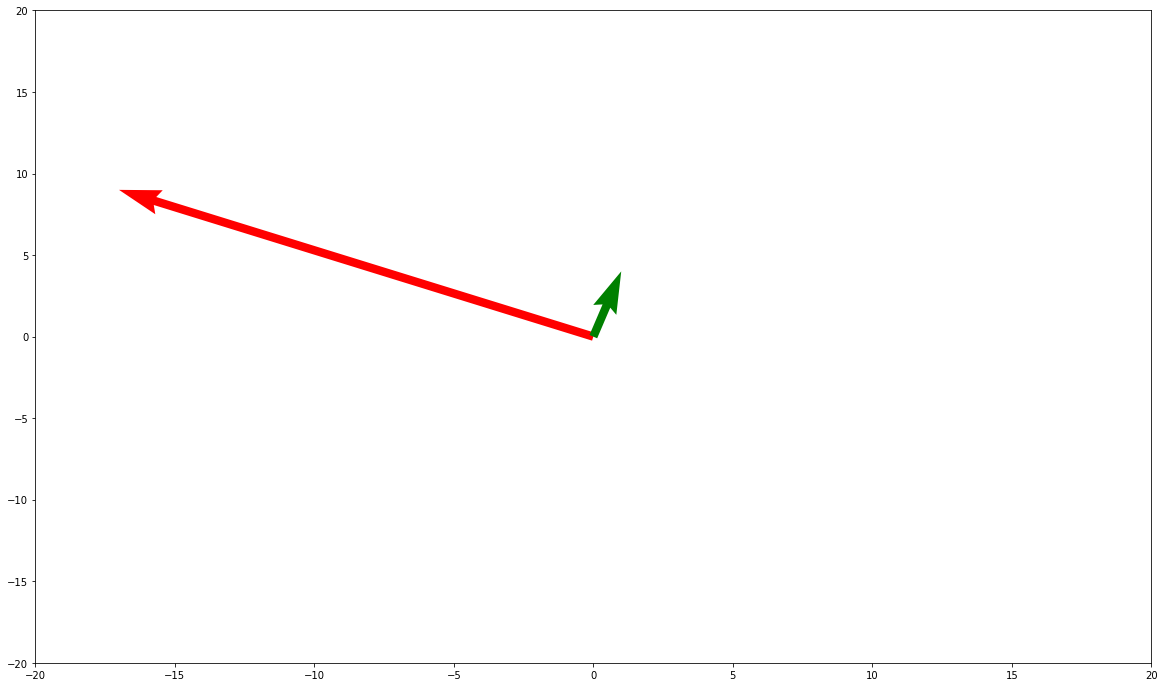

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,12))
origin = [0], [0]
V = np.array([[-17,9],[1,4]])
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

### Finding Eigenvector

Luckily, there is a linear algebra module in numpy that can find an eigenvector for us. We can take our new 
$$
A = 
\left( \begin{array}{cc}
3 & 0 \\
1 & 6 \\
\end{array} \right)
$$
and find out the first,second eigenvector, and eigenvalue of that matrix.


In [10]:
from numpy import linalg as LA
A = np.array([[3,0], [1,6]])
eigvals1, eigvecs1 = LA.eig(A)
print("The 1st and 2nd eigenvectors are: ")
print(eigvecs1)
print("-" * 30)
print("and the eigenvalues are: ")
print(eigvals1)

The 1st and 2nd eigenvectors are: 
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]
------------------------------
and the eigenvalues are: 
[6. 3.]


We will take the first eigenvactor,
$$
u =
\left( \begin{array}{cc}
0 \\
1 \\
\end{array} \right)
$$
and then visualize that it is in fact an eigenvector of A.



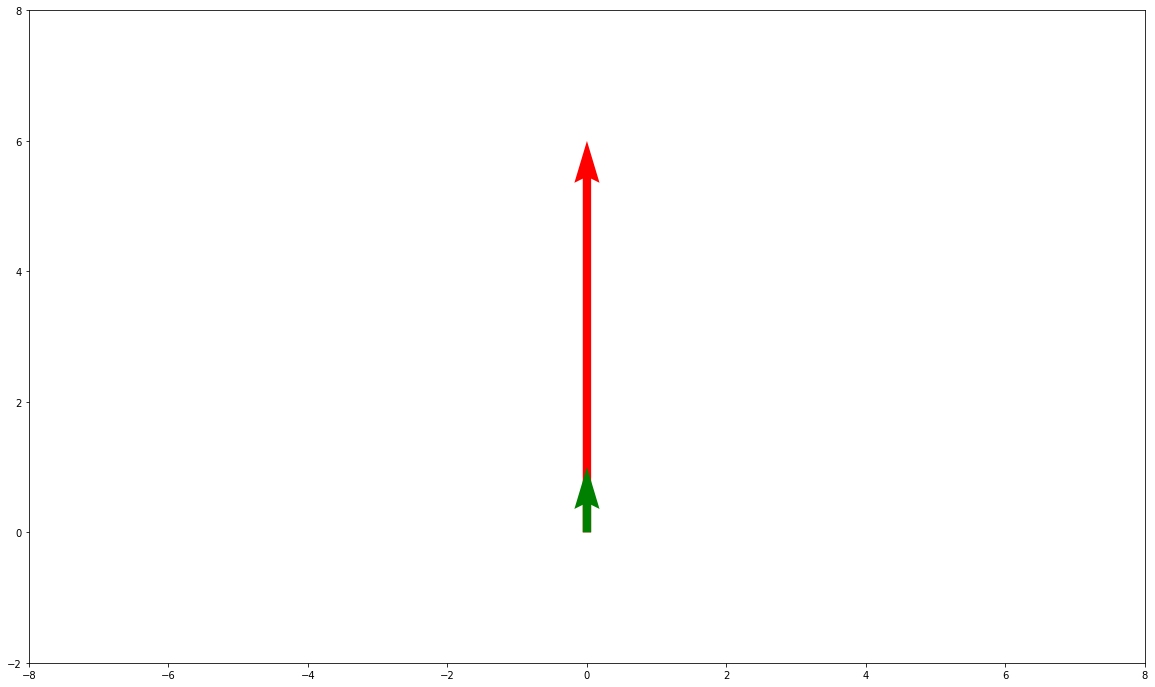

In [11]:
plt.figure(figsize=(20,12))
origin = [0], [0]
V = np.array([[0,6],[0,1]])
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-8,8)
plt.ylim(-2,8)
plt.show()

### Scaling the Data

To better understand how PCA gets started, we need to accommodate for the differences in the scaling of the data. This means that the variance, and resulting bias, we witness should not be due to the differences in measurements.
The first step to undertake is to normalize the data by centering it at 0. We can then utilize the standard score to normalize the data by the variance. The standard score calculates the number of standard deviations a data point is from the mean.

In [12]:
from scipy import stats
a = np.array([0, 0.5, 1, 1.5])
stats.zscore(a)

array([-1.34164079, -0.4472136 ,  0.4472136 ,  1.34164079])

### Constraints on the Data

Furthermore we must remember that PCA requires the matrix to be square. Otherwise,

$m\ne n$ which makes $ \mathbf{v} \ne \mathbf{u}$

Since we want to find the axes that maximizes the variances in the data, we need to find out how the variables in the dataset relate to each other. We can do this by calculating and using the covariance matrix. 

From here we will be using the Iris dataset to visualize the PCA process and taking the sepal length and pedal width columns as our input.

In [13]:
from sklearn import datasets

iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data)
irisdf.drop([1,2],1,inplace=True)
irisData = pd.DataFrame(StandardScaler().fit_transform(irisdf),columns=["x","y"])

covMatrix = pd.DataFrame.cov(irisdf)

covMatrix

,0,3
0,0.685694,0.516271
3,0.516271,0.581006


In [14]:
eigvals, eigvecs = LA.eig(covMatrix)
print("The 1st and 2nd eigenvectors of covMatrix are: ")
print(eigvecs)
print("-" * 30)
print("and the eigenvalues are: ")
print(eigvals)

The 1st and 2nd eigenvectors of covMatrix are: 
[[ 0.74191334 -0.67049578]
 [ 0.67049578  0.74191334]]
------------------------------
and the eigenvalues are: 
[1.1522673  0.11443247]


After computing the covariance matrix, eigenvectors and eigenvalues of our random dataset, we can visualize the dataset along with the first and second eigenvectors. 

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


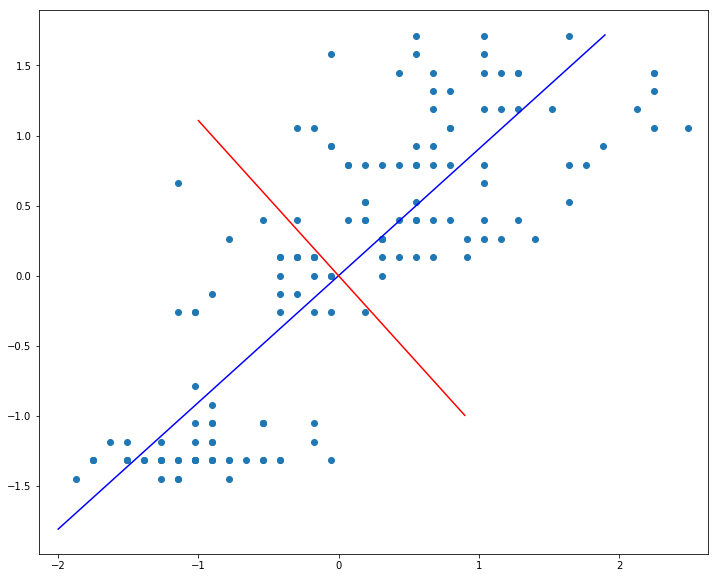

In [15]:
def drawLine2P(x,y, xlims, color):
    xrange = np.arange(xlims[0],xlims[1],0.1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, color)

plt.figure(figsize=(12,10))
plt.scatter(irisData.x, irisData.y)


drawLine2P((0, eigvecs[0,0]), (0, eigvecs[1,0]), (-2, 2), 'b')
drawLine2P((0, eigvecs[0,1]), (0, eigvecs[1,1]), (-1, 1), 'r')
plt.axis("equal");


### Eigenvalues Explain the Variance in the Data



In [16]:
print("The variance captured by the first  eigenvector is: {}".format(eigvals[0]))

print("The variance captured by the second eigenvector is: {} ".format(eigvals[1]))

print("The percentage of variance captured by the first eigenvector is: {}".format(eigvals[0]/ sum(eigvals)))
print("The percentage of variance captured by the second eigenvector is: {}".format(eigvals[1]/sum(eigvals)))

The variance captured by the first  eigenvector is: 1.1522673035090434
The variance captured by the second eigenvector is: 0.11443247277731 
The percentage of variance captured by the first eigenvector is: 0.9096609355116511
The percentage of variance captured by the second eigenvector is: 0.0903390644883489


Now, with our first eigenvector containing 91% of our data, we can project our dataset by multiplying the instances by the eigenvector. 

In [17]:
newData =  irisdf.dot(np.array([[eigvecs[0,0]], [eigvecs[1,0]]]))
newData.columns = ['z']
newData.head()

,z
0,3.917857
1,3.769475
2,3.621092
3,3.546901
4,3.843666


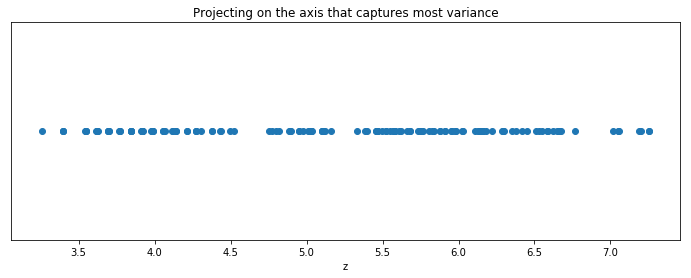

In [18]:
plt.figure(figsize=(12, 4))

plt.xlabel('z')
plt.title('Projecting on the axis that captures most variance')

plt.scatter(newData, [0 for _ in range(len(newData))])
ax = plt.gca()
ax.yaxis.set_visible(False)

The figure above shows the axis and data points after having been projected using the eigenvector that holds the greatest percentage of variance. 

### Running PCA with Scikit Learn

We can also use Scikit learn to provide similar results with our Iris dataset.

Here we find the same values for variance:  [0.90966094 0.09033906]
and the same eigenvectors:  [[ 0.74191334  0.67049578]
 [-0.67049578  0.74191334]]


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


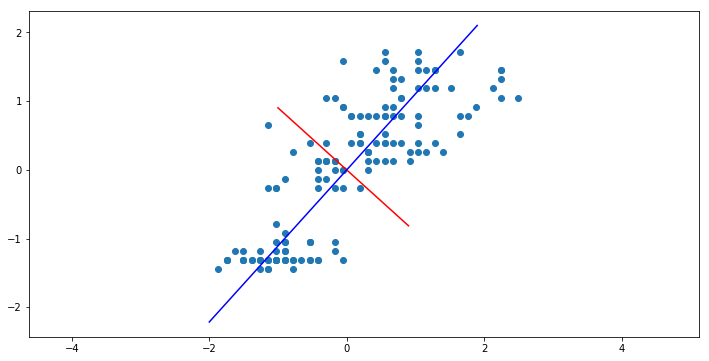

In [19]:
pca = PCA(n_components=2)

_ = pca.fit(irisdf)

print("Here we find the same values for variance: ", pca.explained_variance_ratio_)
print("and the same eigenvectors: ", pca.components_)
plt.figure(figsize=(12,6))
plt.scatter(irisData.x, irisData.y)

drawLine2P((0, pca.components_[0,0]), (0, pca.components_[1,0]), (-1, 1), 'r')

drawLine2P((0, pca.components_[0,1]), (0, pca.components_[1,1]), (-2, 2), 'b')

plt.axis("equal");

### Data eigenvectors and eigenvalues

To conclude the scikit learn portion of performing PCA on the iris dataset, we can visualize the eigenvectors as simple vectors. 

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


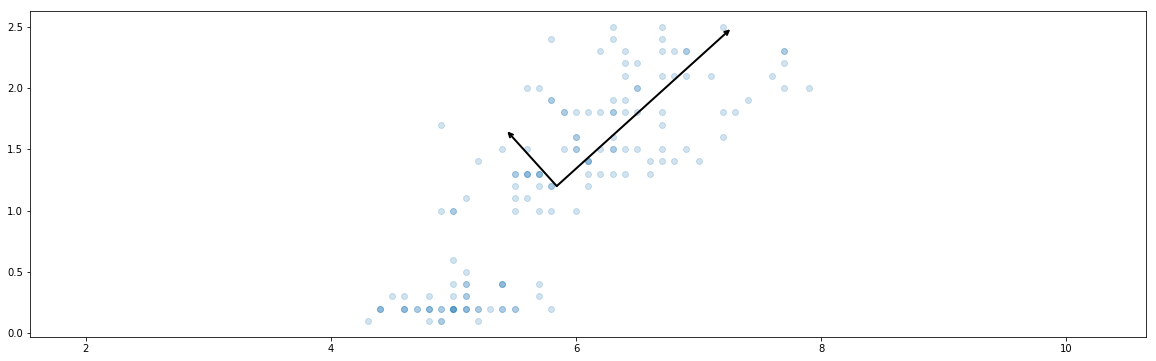

In [20]:
X = irisdf.as_matrix()

pca = PCA(n_components=2)

pca.fit(X)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(20,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA Advantages and Limitations

PCA has a primary advantage of being able to handle linear data well. However, this advantage becomes a limitation when it comes to non-linear data. A limitation of PCA is that it may not work well or at all with non-linear or surfaces that are wierd and curved. This limitation led to the development of more advanced algorithms like Manifold Learning. In addition, since PCA works through linear dimensionality reduction, PCA cannot cluster data that has a non-linear global structure. Always keep in mind that PCA is "more useful as a visualization technique than as an analytical method." In addition to this, it is important to keep in mind that you can lose interpretability of the variables in the data when it is reduced. 

These limitations are to be remembered as fields that use PCA do make a point to remind about the limitations of it, like [biology](http://fortinlab.bio.uci.edu/FortinLab/Teaching_files/Stats/POS_Principal_component_analysis.pdf) and [stastical learning](http://www.svcl.ucsd.edu/courses/ece271B-F09/handouts/Dimensionality2.pdf) (as well as this course!).

#### Example

Let's take a look at how PCA can be used by using the MNIST dataset. The MNIST dataset 

In [22]:
data = pd.read_csv("data/mnist_test.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data is from the mnist data set and is the "testing" potion of the dataset. There are 10,000 entries in the testing portion, with the first column being the label, and the subsequent columns being the pixels. The images are 28x28 pixel images, so 1x1 is the first pixel from the left in the first row and 28x28 is the last pixel on the right in the last row. This dataset was obtained from Kaggle 
(https://www.kaggle.com/oddrationale/mnist-in-csv). For those who do not want to create a Kaggle account, here is the source that was referenced by the Kaggle page: https://pjreddie.com/projects/mnist-in-csv/ (note that you would need to place the header line manually or by modifying the script that is shown on the page, thus for those who are unfamiliar with Python to use the Kaggle dataset). 

In [23]:
X, y = data.iloc[:, 1:], data['label']
print(X.shape)

(10000, 784)


label:  7


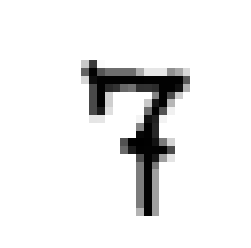

In [24]:
import random
numb = random.randint(0,X.shape[0]-1)
some_digit = X.iloc[numb].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
_ = plt.axis("off")
print("label: ",y[numb])

#### Note

The random number generator above is used to verify that the data corresponds to the correct label. Here we check to see what the data in the mnist data set looks like by converting the 1D array of 784 pixel values into a 28D array with 28 entries for each dimension. We then can check if the labels for the dataset are indeed correct. Below is a random sampling of the dataset.

<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/digits.png" width="500">

#### How do we plot the data?
There are different means of how to project the data. For the following example, we shall be doing a plot embedding function from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py to show the visualization of the embedding results from a projection.

In [25]:
# function obtained here: 
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
from matplotlib import offsetbox
#from sklearn import datasets
                    

#digits = datasets.load_digits(n_class=10)
#X = digits.data
#y = digits.target
#n_samples, n_features = X.shape
n_neighbors = 30

def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,4))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #imagebox = offsetbox.AnnotationBbox(
             #   offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
             #   X[i])
            #ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


In [26]:
X_subset = X.iloc[0:500]
y = y.iloc[0:500]
X_subset.shape
n_samples, n_features = X_subset.shape

We will work with a smaller subset of the initial dataset to reduce the number of calculations. When working with data, it is best to assume that the numbers were not randomly distributed. Thus we select a random sampling of the dataset. Below we have a random projection of the data.

### Projecting the mnist dataset to reduce dimensionality and better visualize the dataset

There are various techniques to reduce the dimensionality of a dataset. Two that will be observed are the random projection matrix technique and the Singular Value Decomposition techinique. 

### Random projection matrix
One of the quickest ways to reduce dimensionality is to use a random projection. There are variety of random projection techniques, but at their core, they work by multiplying the original matrix that represents the data, by a new projection matrix. If the original data matrix has the m rows and n columns, (ie, m data points and n columns/features) it is multiplied by a projection matrix that has n rows and k columns, where k will be the desired dimension we want to reduce the data to. The various random projection techniques are the different ways in which to fill up the projection matrix. More information can be found [here]( https://turi.com/learn/userguide/feature-engineering/random_projection.html).

Computing random projection on the 28x28 digits


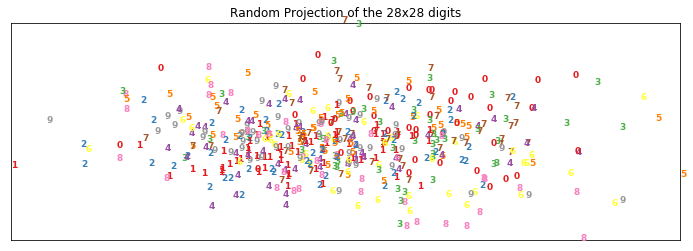

In [27]:
# Random 2D projection using a random unitary matrix

from sklearn import random_projection
print("Computing random projection on the 28x28 digits")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X_subset)
plot_embedding(X_projected, y, "Random Projection of the 28x28 digits")

#### How does Sparse Random Projection work?
For this example we used the Sparse Random Projection method in scikit-learn. This method reduced the initial high dimensional MNIST dataset of 784 dimensions down to a two-dimensional representation. Unlike PCA, sparce random projection uses a sparse random matrix as an alternative to other implementations that use a dense random projection to increase computation time, as well as improving memory efficiency.
For more information on `SparseRandomProjection` go to [this](https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.SparseRandomProjection.html#sklearn.random_projection.SparseRandomProjection.fit_transform). Now let's see PCA.

#### PCA Example
We shall be showing the output of projecting onto the first two principal components.

Computing PCA projection


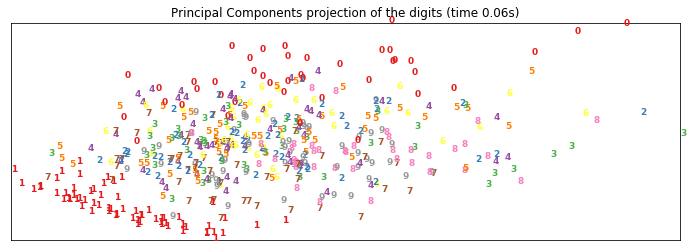

In [28]:
# Projection on to the first 2 principal components
from sklearn import decomposition
from time import time
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X_subset)
X_pca
plot_embedding(X_pca, y,
               "Principal Components projection of the digits (time %.2fs)" % (time() - t0))


#### How does PCA work (scikit-learn)?
Now unlike using eigenvectors and eigenvalues, the PCA implementation in scikit-learn uses Singular Value Decomposistion or SVD. 

### PCA and Singular Value Decomposition (SVD)
The next two examples focus on using Singular Value Decomposition or SVD instead of eigenvextors and eigenvalues. Singular value decomposition consists of determining three components that make up a matrix. The dot product of these three components in a specific order will reproduce the original matrix. Thus, if we have the original matrix that represents our data $A$, its single value decompositon (SVD) can be represented by the following equation, where $\cdot$ is the dot product.

\begin{equation}
A = U \cdot \Sigma \cdot V^{T}
\end{equation}

Notice the three component matricies that make up $A$, they are U, $\Sigma$ and $V^{T}$ and are defined below.

 - $A$ is the original $m$ $x$ $n$ matrix with your data

 - $U$ is an $m$ $x$ $n$ matrix

 - $\Sigma$ is an $m$ $x$ $n$ diagonal matrix

 - $V^{T}$ is a transpose of an n x n matrix

    
The values of U, $\Sigma$ and $V^{T}$ are determined using "iterative numerical methods" and for our purposes the means in which they are obtained are not important. Honestly, in terms of using PCA and SVD in python, what each matrix component is isn't really necessary either. Although its never really a good idea to treat everything as magic, obtaining each componenet matrix and what each actually represents pertains to linear algebra.

What is necessary however is to understand the notion that the dot product of U and the top k largest singular values in $\Sigma$ ($U \cdot \Sigma$), will yield a new matrix with reduced dimensions. For example, if $k=2$, then only the top 2 columns of the diagonal matrix $\Sigma$ will be used and the new matrix produced will have the same number of rows as the orginial matrix A, but instead of having n columns, it will only have 2 columns. Note that the number of $rows(m)$ in $\Sigma$ will remain the same regardless of what value of k is used. This is how we can reduce higher dimension datasets into 2D and visually see it. This works because the vast majority of the information regarding varience in the data is condensed in the topmost columns of $\Sigma$, so even though we are only taking the top k values of sigma to use to represent the data, a lot of variance can still be retained. The next cell shows an example of how this works in practice.
<br>
<br>This information can be found more in depth <a href="https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/">here</a> 
and [here](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm) or by looking up Singular Value Decomposition online.

In [29]:
# this was obtained from https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/ and modified slightly
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([
    [1,2,3,4,5,6,7,8,9],
    [11,12,13,14,15,16,17,18,19],
    [21,22,23,24,25,26,27,28,29]#,
    #[12,2,3,14,28,16,23,22,25],
    #[11,20,44,25,15,35,29,8,18]
])
# Singular-value decomposition
U, s, VT = svd(A)

# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)

# select
n_elements = 2
Sigma_k = Sigma[:, :n_elements]

# reduce dimensions
T = U.dot(Sigma_k)

Lets start out with a matrix that somewhat represents our mnist dataset. We will use the matrix below.
    In terms of our mnist example, this would be like saying, each number is represented by a 3x3 pixel grid,
    where columns represent values of pixels and rows represent the numbers themselves,
    so for this example, we have 3 numbers that are represented by a 3x3 pixel grid

In [30]:
print(A)

[[ 1  2  3  4  5  6  7  8  9]
 [11 12 13 14 15 16 17 18 19]
 [21 22 23 24 25 26 27 28 29]]


Since the diagonal matrix produced by singular value decomposition (svd) is a m x m, matrix as we can see below.

In [31]:
print(diag(s))

[[8.95241512e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.35817231e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.54873604e-15]]


The matrix needs to be converted to the sigma matrix which is a m x n matrix, with the first m x m values consisting of the diagonal matrix obtained from the svd function.

In [32]:
print(Sigma)

[[8.95241512e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.35817231e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.54873604e-15 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


If we want to visualize our dataset in 2D we take K to be 2 and use only the k highest columns, (ie columns 1 and 2) of the sigma matrix note that the number of rows m remains the same, since that is how many numbers are in our dataset


In [33]:
print(Sigma_k)

[[89.52415118  0.        ]
 [ 0.          6.35817231]
 [ 0.          0.        ]]


However, before we find the dot product of U and sigma, lets see what U looks like first.

In [34]:
print(U)

[[-0.17752681  0.89544266  0.40824829]
 [-0.50968625  0.27120705 -0.81649658]
 [-0.84184569 -0.35302857  0.40824829]]


We see that once we obtain the dot product of U and sigma, we have the dimensionality of our dataset reduced from 10D to 2D.


In [35]:
print(T)

[[-15.89293674   5.69337875]
 [-45.62922868   1.72438114]
 [-75.36552061  -2.24461648]]


Here is our original dataset again for comparision

In [36]:
print(A)

[[ 1  2  3  4  5  6  7  8  9]
 [11 12 13 14 15 16 17 18 19]
 [21 22 23 24 25 26 27 28 29]]


Now let's look at PCA again.

Computing PCA projection on the 28x28 digits using the dense data model


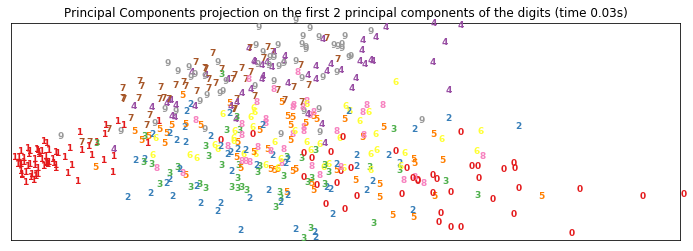

In [37]:
# Projection on to the first 2 principal components
from sklearn import decomposition
from time import time
print("Computing PCA projection on the 28x28 digits using the dense data model")
t0 = time()
X_pca = decomposition.PCA(n_components=2, random_state=42).fit_transform(X_subset)
plot_embedding(X_pca, y,
               "Principal Components projection on the first 2 principal components of the digits (time %.2fs)" %
               (time() - t0))

### Whats going on here?
Singular value decomposition is being used in the `decomposition.PCA` function to reduce the 784D mnist dataset to a 2D representation. `n_components` is the "dimensionality of the target projection space" and `random_state` is the seed for the random number generator.
For more information on `decomposition.PCA` go [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) 



Computing PCA projection on the 28x28 digits using the sparse data mode


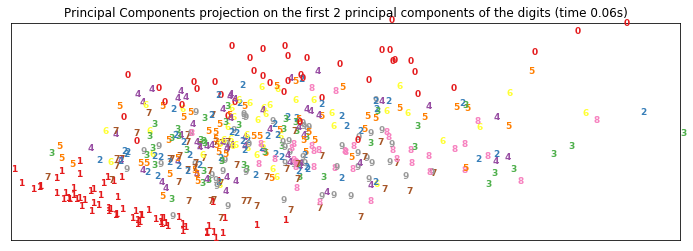

In [38]:
# Projection on to the first 2 principal components
print("Computing PCA projection on the 28x28 digits using the sparse data mode")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2, random_state=42).fit_transform(X_subset)
plot_embedding(X_pca, y,
               "Principal Components projection on the first 2 principal components of the digits (time %.2fs)" %
               (time() - t0))


### Whats going on here?
Instead of having to determine all of the component matricies using singular value decomposition (SVD), the truncated SVD is instead using to make apporximations that produce generally similar results. The `decomposition.TruncatedSVD` function thus also reduces the 784 dimension mnist dataset to a 2D representation, but instead of using exact values, does so with approximations. `n_components` is the "dimensionality of the target projection space" and `random_state` is the seed for the random number generator. 
For more information on `decomposition.TruncatedSVD` check [this](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) and [this](http://langvillea.people.cofc.edu/DISSECTION-LAB/Emmie%27sLSI-SVDModule/p5module.html).
    

### Differences between `decomposition.PCA` and `decomposition.TruncatedSVD` 
The difference between `decomposition.TruncatedSVD` and `decomposition.PCA` is that the `decomposition.TruncatedSVD` estimator does not center the data before computing the singular value decomposition, which  `decomposition.PCA` does. Basically, this means that `decomposition.TruncatedSVD` is better for use with sparse data and `decomposition.PCA` is better to use with dense data. Additionally, as stated in the above cell, truncated SVD uses approximations instead of exact matrcies to reduce dimensionality.
More info found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html ).

### Using digits with different dimensions
We saw that the 28x28 pixel digits were rather hard to project well in 2 dimensions. However, the results seems much better when a lower density pixel count is used, such as with a 8x8 pixel representation. These examples were again obtained from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py However, the dataset is the built in mnist dataset in python.

In [39]:
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X_2 = digits.data
y_2 = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [40]:
X_2.shape

(1797, 64)

Computing random projection on the 8x8 digits


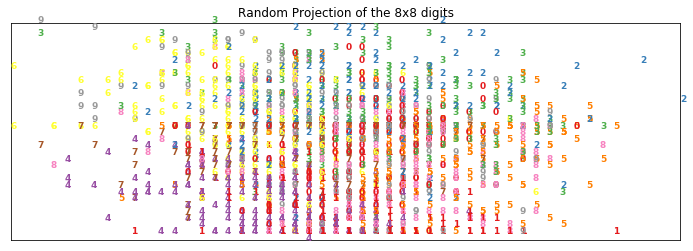

In [41]:
print("Computing random projection on the 8x8 digits")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X_2)
plot_embedding(X_projected, y_2, "Random Projection of the 8x8 digits")

Computing PCA projection on the 8x8 digits using the dense data model


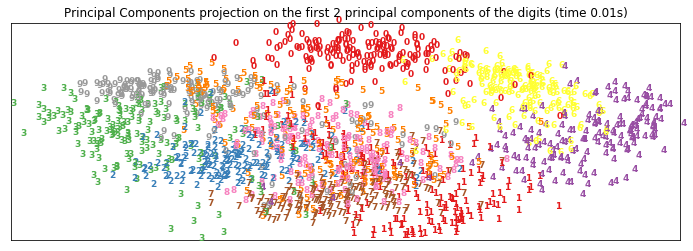

In [42]:
# Projection on to the first 2 principal components
print("Computing PCA projection on the 8x8 digits using the dense data model")
t0 = time()
X_pca = decomposition.PCA(n_components=2, random_state=42).fit_transform(X_2)
plot_embedding(X_pca, y_2,
               "Principal Components projection on the first 2 principal components of the digits (time %.2fs)" %
               (time() - t0))

Computing PCA projection on the 8x8 digits using the sparse data model


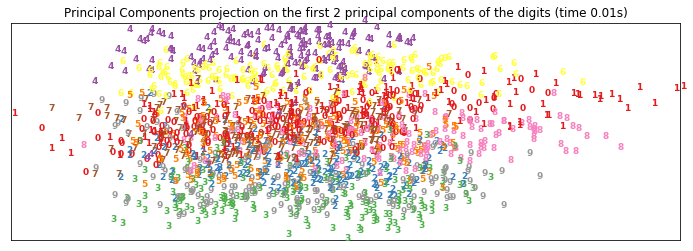

In [43]:
print("Computing PCA projection on the 8x8 digits using the sparse data model")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X_2)
plot_embedding(X_pca, y_2,
               "Principal Components projection on the first 2 principal components of the digits (time %.2fs)" %
               (time() - t0))

### Sneak Peek
Here is the dimensionality of the data reduced using t-SNE which we will be covering next. Here is an example of t-SNE on 28x28 digits.


Computing t-SNE embedding on 28x28 digits


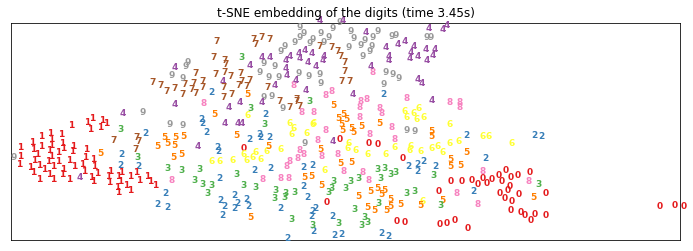

In [44]:
print("Computing t-SNE embedding on 28x28 digits")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_subset)

plot_embedding(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Here is another example of t-SNE on 8x8 digits.

Computing t-SNE embedding on 8x8 digits


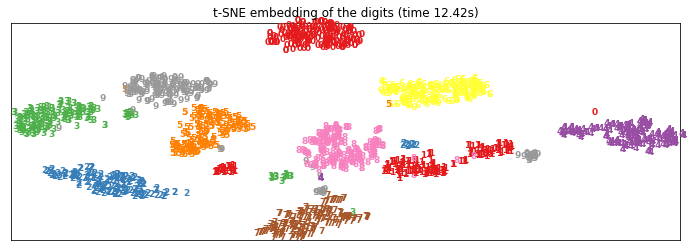

In [45]:
print("Computing t-SNE embedding on 8x8 digits")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_2)

plot_embedding(X_tsne, y_2,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

## t-SNE

### Introduction

t-Distributed Stochastic Neighbor Embedding or t-SNE is is a dimensionality reduction technique that is particularly well suited for the visualization of high-dimensional datasets ([link to paper](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)). Thus it is ideal for plotting things down in two or three-dimensional map. Like PCA, t-SNE takes a high dimensional dataset and reduces it to two dimensions. t-SNE emphasizes retaining the "neighborhoods" (hence the neighbor embedding in the name), but there are no gurantees about distant points that are in the higher dimension. 

An example of this can be seen here:
<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/t-SNE_Intro.png" width="900">

As seen in this example, there is no clear linear axis by which one could project while maintaining the variance. 

t-SNE was develped by Geoffrey Hinton and Laurens van der Maaten which was based on Stochastic Neighbor Embedding (SNE). We will go over SNE next to show the underlying basis for t-SNE. There is a newer dimensionality reduction method called UMAP ([link to project](https://github.com/lmcinnes/umap)) which will be covered in a later lecture. Unlike t-SNE which was not meant to work with algorithms, as it is primarily for visualization, UMAP is a dimension reduction technique that works for visualization and as a general dimension reduction method.


## SNE 

Stochastic Neighbor Embedding or SNE was introduced by Geoffrey Hinton and Sam Roweis ([link to paper](http://papers.nips.cc/paper/2276-stochastic-neighbor-embedding.pdf) - SNE is reviewed by the t-SNE paper, so this is just a reference). SNE preserves the distances between the nearest neighbors in high-dimensional space by making them nearest neighbors in low-dimensional space. This is an approach that common to many non-linear dimensionality reductions. Unlike PCA, SNE is not concerned by the variance (distance between far away points) when doing dimensionality reduction. Thus it makes SNE ideal and robust for highlighting clusters similiarities in lower-dimensional space. 

A two-dimensional space reducted to a single dimensional space can be grouped up as shown below.

<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/shuffle_data.png" width="700">

An example of the process itself can seen as follows:

<img src="http://128.171.10.138:4000/assets/ipynb/week_15/images/t-SNE_intuition.png" width="700">

### How does it work?

SNE works by modeling the similiarity between instances using probability of points being together as neighbors.  So given a point $x_i$ the probability of $x_j$ being picked by $x_i$ as its neighbor is:

\begin{equation}
p_{j|i} = \frac{exp(-|x_i -x_j|^2) / 2\sigma^2_i)}{\sum_{k \ne i} exp(-|x_i -x_k|^2/2\sigma^2_i)}
\end{equation}

Note that the $\sigma$ is the variance of the Gaussian that is centered on the point $x_i$. In this regard, it is similiar to KDE, but instead of it being variance, it is point dependent. Thus for nearby points to $x_i$ the $p_{j|i}$ would be relatively high, but for wide spread points it would be small. In the low dimensional space (ex. having a dimension d where d=2) we define the distance between the points i and j as:

\begin{equation}
q_{j|i} = \frac{e^{-|y_i -y_j|^2}}{\sum_{k \ne i} e^{-|y_i -y_k|^2}}
\end{equation}

This is similar to the distance in the high-dimensional space, except that variance in constant and same across all the points.

We want to reconcile the distances in high-dimensional space and low-dimensional space. In order to do so, we want to infer new distance in space y. However, which distances make sense? In order to figure out what distance to use, SNE proposed a cost function that is used to minimize the distances in both coordinate systems. The minimization is done using the Kullback–Leibler (KL) divergence. KL divergence between the two dimensions of $p$ and $q$ are desribed as follows:

\begin{equation}
KL(p||q) \sum_{ij} p_{j|i} log\frac{p_{j|i}}{q_{j|i}}
\end{equation}

KL divergence is simply a measure of how one probability distribution is different from a second, reference probability distribution. Thus we are using the higher dimension probability distribution and the low dimensional probability of the two points. What we need to do is find the sets of $y_{i|j}$ which minimize the KL divergence. This minimization is done though a gradient descent method. We shall have a short introduction to gradient descent and an aside for optional reading.

#### Gradient Descent
Gradient descent is an optmization algorithm used to minimize the function through an iterative approach.This iteration is done through moving incrementally using a step size. See [1](https://homes.cs.washington.edu/~marcotcr/blog/gradient-descent/) and [2](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote07.html) for some additional details. The first provides a good overview and the second going into further details. 

#### Aside - Gradient Descent
A modified vesrion of gradient descent called stochastic gradient descent (SGD) is used in machine learning. This is done in neural networks (NN) due to the cost of sending back information through the network (propagation) when running a training set. By doing this, SGD can lead to a faster convergence (finding values to produce correct output). See [this](http://deeplearning.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/) for more information. 

### SNE - Why does this work?

So looking at this, how would this work? We are comparing two probability distributions in different dimensions. Let us look at the equation again. 

\begin{equation}
KL(p||q) \sum_{ij} p_{j|i} log\frac{p_{j|i}}{q_{j|i}}
\end{equation}

First $p_{j|i}$ is the probability that $i$ would pick $j$ as its neighbor. Since this probability is based on a Gaussian, $p_{j|i}$ has a range from 0 to 1. If the value is close to 0, it means that $i$ is far from $j$. Likewise if the value is close to 1, it means that $i$ is very close to $j$. The same value range and value meaning is applied to $q$. However, note that $q$ will never be 0. We can verify this by looking at the function. A power of a value would not result in a value of 0. 

\begin{equation}
q_{j|i} = \frac{e^{-|y_i -y_j|^2}}{\sum_{k \ne i} e^{-|y_i -y_k|^2}}
\end{equation}

Now let us look at the possibilities for the values of $KL(p||q)$. We have three combinations to look at. 

1.  If $p_{j|i}$ is close to one and $q_{j|i}$ is close to one, then KL(p||q) is close to 0. This generalizes to $p_{j|i} \approx q_{j|i}$. This makes sense as we are measuring the distance between the two distributions. 

2. If $p_{j|i}$ is large and $q_{j|i}$ small, then $KL(p||q)$ is high. This is not a good solution as this implies that two distributions are far apart. 

3. If $p_{j|i}$ is small and $q_{j|i}$ large, then $KL(p||q)$ small. It's okay to put two points close to each other in low dimensions, although they were distant in high dimensions. There is a high cost of using a wider separation of map points for points that are close together than a closer map points for points that are futher apart. A close example for this is a map of the United States. If one wanted to have a consistant scale of distance on the map, most maps of the United States would be incorrect as Alaska is often scaled down to fit on the map (given that Alaska is about half the size of the contiguous 48 states).


## t-SNE vs SNE

So how is t-SNE different from SNE? To start, t-SNE itself is an improvment on SNE. This improvement is the finding an aleviation to two problem faced by SNE, which was its cost function with symmetric SNE and what Hinton et al. noted as the "crowding problem" with a t-distribution.

### Symmetric SNE

One problem with the caculations for SNE is the complexity needed for it, thus with t-SNE, symmetric SNE was presented. Besides doing a summation of the KL divergences of the probabilities for $p_{j|i}$ and $q_{j|i}$, a single KL divergence could be done on the joint probability of the high-dimensional space $P$ and the joint probability of the low-dimensional space $Q$. In low-dimensional space, symmetric SNE computes $q_{ij}$ and in high-dimensional space symmetric SNE computes $p_{ij}$.

\begin{equation}
p_{ij} = \frac{e^\frac{{-|x_i -x_j|^2}}{2\sigma^2}}{\sum_{k \ne i} e^\frac{{-|x_i - x_k|^2}}{2\sigma^2}}
\end{equation}

\begin{equation}
q_{ij} = \frac{ \frac{1}{1+|y_i-y_j|^2}}{\sum_{k\ne i}\frac{1}{1+|y_i-y_j|^2}}
\end{equation}

Symmetric SNE allows for a simplification of the gradient which is faster to compute. This can be easily achieved by assuming that $\sigma$ is constant in higher dimensional space.


### Crowding Problem 

Going from a higher dimensional space to a lower dimensional space presents a problem for the placement of points. For example going from a higher dimensional space to a two-dimensional map the map can work with distant points but does not have the area required to accomidate for somewhat near points. This problem was described in SNE with the map of the United States example. If one wants to model small distances between points accuractely, it would result in points that are somewhat near to be placed at a further distance on the map. This can be seen as the inverse of the "curse of dimensionality" where unlike the problem of the sparseness of points in higher dimensions, we are dealing with the problem of how to appropriately handle the scale of distance between points in lower dimensions. 

#### Crowding Problem Aleviation
In order to aleviate this, t-SNE uses a t-distribution, rather than Gaussian. A t-distribution would allow large point clusters that are far apart in a high dimensional space to act in the same way when in a lower dimensional space. By using a t-distribution, it gives more value to distant points that are spread out the area in 2-d space.

## Advantages and Limitation
t-SNE itself yields, in most cases,  much better representations of data compared to SNE. This can be attributed to the usage of the t-distribution. In addition it presents a method to handle the problem that the curse of dimensionality has on points and how the points could be visualized. 

However there are limitations to t-SNE. The run time of t-SNE shows a computational complexity as it runs in quadratic run time. This means that t-SNE is not scalable to extremely large datasets. There have been introduction of variations of t-SNE that works around this. 

### Improvements on t-SNE
A realtime t-SNE visualization was introduced an algorithm (Barnes-Hut) was used to approximate the repulsion forces and GPUs were leverated to increase the computation time ([see here](https://ai.googleblog.com/2018/06/realtime-tsne-visualizations-with.html)). An example of this is shown below for the MNIST dataset.
![realtimetsne](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s1600/image2.gif "realtime t-SNE")

(Source: https://ai.googleblog.com/2018/06/realtime-tsne-visualizations-with.html )


## Aside Notes
- t-SNE and SNE are one of the newer algorithms compared to PCA (1930's)
- UMAP ([link to project](https://github.com/lmcinnes/umap)), as mentioned earlier is one of the latest addition to dimensionality reduction algorithms and visualization.

An example of UMAP can be seen here with the MNIST dataset.

<img src="https://github.com/lmcinnes/umap/blob/master/images/umap_example_mnist1.png?raw=true" width="700">